In [19]:
%config InlineBackend.close_figures = False
set_matplotlib_formats('svg')

## Artist对象

**artist对象**: 用于处理图元的绘制和布局;  

* 简单类型(基本图元): Line2D, Rectangle, Text, AxesImage
* 容器类型(复合图元): Axis, Axes, Figure

绘图流程:  
1. 创建图形对象(Figure)
1. 在图形对象之中创建子图对象(轴对象, Axes)
1. 调用子图对象的各种方法创建基本图元

使用函数plt.figure()创建图形对象;  
使用fig.add_axes()为图形对象添加子图对象;  
* 可以使用四元组指定子图的位置: `[left, bottom, width, height]`
* `projection` : 指定轴的投影类型;

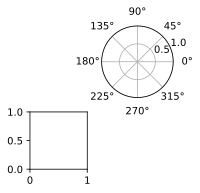

In [20]:
plt.close('all')
fig = plt.figure(figsize=(2,2))
ax = fig.add_axes([0, 0, 0.4, 0.4])
ax1 = fig.add_axes([0.5, 0.5, 0.5, 0.5], polar=True)
plt.show()

ax.plot(): 绘制二维曲线, 返回一个Line2D对象列表

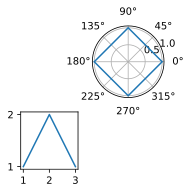

In [21]:
pi = np.pi
ax.plot([1, 2, 3], [1, 2, 1])
ax1.plot([0, pi/2, pi, 3*pi/2, 0], [1, 1, 1,1,1])
plt.show()

通过 set_xlabel() 设置X轴上的标题

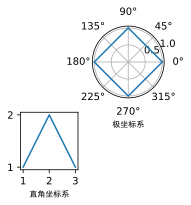

In [22]:
ax.set_xlabel("直角坐标系", fontdict={'fontname': 'simhei', 'fontsize':8})
ax1.set_xlabel("极坐标系", fontdict={'fontname': 'simhei', 'fontsize':8})
plt.show()

查看set_xlabel()的源码: ` return self.xaxis.set_label_text(xlabel, fontdict)`;  
`ax`的`xaxis`是一个**XAxis**对象, 其`label属性`是一个**Text**对象, Text对象的`_text属性`是我们需要设置的;

In [23]:
%P ax.xaxis; ax.xaxis.label; ax.xaxis.label._text; ax.get_xlabel()

 1: XAxis(0.000000,0.000000),     2: Text(0.5,-21,'直角坐标系'),     3: 直角坐标系,     4: 直角坐标系,    


In [24]:
kk 1

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>!kk1:active>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


### Artist对象的属性

Figure对象和Axes对象的都有`patch属性`, 它是一个Rectangle对象, 通过该属性可以设置图形对象的背景色和透明度

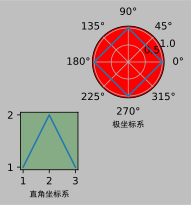

In [25]:
# plt.close("all")
fig.patch.set_color("gray"); fig.patch.set_alpha(0.5)
ax.patch.set_color('green'); ax.patch.set_alpha(.3)
ax1.patch.set_color('red'); ax.patch.set_alpha(.3); 
# fig.canvas.draw() #跟新界面显示
plt.show()

Artist对象的所有属性都可以通过相应的`ax.get_*()`和`ax.set_*()`进行读写;  
`plt.getp()`: 一次性获取图元的属性;  
`ax.set()`或`plt.setp()`: 一次性设置图元的属性;

In [26]:
line = ax.lines[0] # 必须取一条线条, 不能去掉[0]
line1= ax1.lines[0]

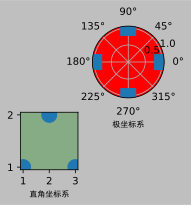

In [27]:
# plt.getp(line)
line.set(ls='None', marker='o', ms=15)
line1.set(ls='None',marker='s', ms=15)
plt.show()

所有Atist对象都具有的一些属性:
>|属性       |        说明|
|:-------------|:--------------|
| alpha      | 设置对象的透明度,0-1|
| label      | 文本标签,str|
| visible     | 控制对象是否可见|
|||
| axes       | 判断对象所在的子图对象|
| figure      | 判断对象所在的图表对象|
|||
| clip_box     | 对象的剪裁框|
| clip_on      | 是否剪裁|
| clip_path     | 剪裁的路径|
|||
| picker      | 控制对象选取| 
| zorder      | 控制绘图顺序|
| contains     | 判断指定点是否在对象之上|
| transform    | 控制对象的偏移, 旋转, 缩放等坐标变换|

### Figure容器

add_subplot(), add_axes() 都可以往图表中添加子图, AxesSubplot类是Axes的派生类

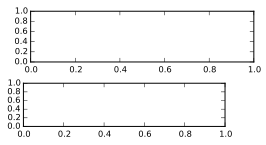

In [6]:
%matplotlib_svg
plt.close("all")
fig = plt.figure( figsize = (4,2) )
ax1 = fig.add_subplot(211)
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3])
# print ax1 in fig.axes and ax2 in fig.axes

可以用for循环 对Axes属性 中的每个元素进行操作

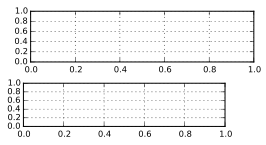

In [9]:
for ax in fig.axes:
    ax.grid(True)
plt.show()

In [19]:
#%hide
plt.close("all")

图表对象是一个容器类型的 Artist对象, 可以拥有自己的文本, 线条, 图像-

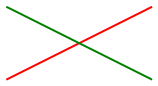

In [18]:
from matplotlib.lines import Line2D

fig = plt.figure( figsize = (2,1) )

line1 = Line2D([0, 1], [0, 1], color="r", \
               transform=fig.transFigure, figure=fig)
# transform = fig.transFigure 
# 将figure对象的坐标系赋给Line2D对象的transform属性

line2 = Line2D(
    [0, 1], [1, 0], transform=fig.transFigure, figure=fig, color="g")

fig.lines.extend([line1, line2])


>Figure对象 包含的简单类型对象都作为 Figure对象的属性名存在

|属性        |说明     |
|:--------------|:----------|
| axes       |  包含Axes子图对象的 列表 |
| texts       | Text对象 列表, 用于显示文字|
| legends     |  Legend对象 列表  |
| lines       | Line2D对象 列表|
| patch      |   作为背景的Rectangle对象|
| patches     |  Patch对象列表|
| images       |FigureImage对象列表|

### Axes容器

子图容器是整个matplotlib的核心, 既可以查看其它简单对象的列表(作为axes的属性), 又可以创建其它简单对象( axes 的方法)

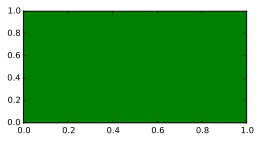

In [23]:
plt.close("all")
fig = plt.figure( figsize = (4,2) )
ax = fig.add_subplot(111)
ax.patch.set_facecolor("green")
# 子图对象的坐标系是笛卡尔坐标时, patch属性是一个Rectangle对象
#  图对象的坐标系是极坐标时, patch属性是一个Circle对象

> 描述调用 Axes的plot()方法时发生了什么?
接收plot()里面的参数, 创建一组 Line2D对象, 并将其添加进 Axes对象的lines属性, 返回所创建的 Lin2D对象列表

In [39]:
x, y = np.random.rand(2, 100)
line = ax.plot(x, y, "-", color="blue", linewidth=2)[0]
line

Patch对象 是一种和 Line2D对象 类似的简单Atist对象, 它描述
的实体不是线条, 而是长条矩形

True

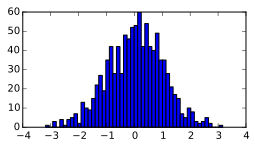

In [7]:
fig, ax = plt.subplots(figsize=(4,2))
n, bins, rects = ax.hist(np.random.randn(1000), 50, facecolor="blue")
#   n 是每个区间中点的个数
rects[0] is ax.patches[0]

add_line() 和 add_patch() 在子图中添加简单对象

(0.0, 1.0)
(1.0, 1.0, 1.0, 1.0)
(1.0, 2.2000000000000002)


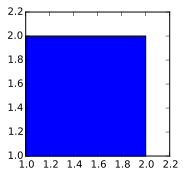

In [14]:
#  创建子图对象 ax, 和矩形对象 rect
plt.close("all")

fig = plt.figure(figsize = (2,2))
ax = fig.add_axes([0,0,1,1])
             
rect = plt.Rectangle((1,1), width=1, height=1)

# 将 矩形对象 rect 添加进 子图对象 ax
ax.add_patch(rect) # rect.get_axes() is ax -->True

print ax.get_xlim() # ax的X轴范围为0到1，无法显示完整的rect
print ax.dataLim._get_bounds() # 数据的范围和rect的大小一致
ax.autoscale_view() # 自动调整坐标轴范围
print ax.get_xlim() # 于是X轴可以完整显示rect

> Axes 对象的属性

| 属性    |说明    |
|:---------|:--------|
| patch     | 作为Axes背景的Patch对象, 可以是Rectangle或Circle| 
| legends    | Legend对象列表|
| lines     | Line2D对象列表|
| patches    | Patch对象列表|
|         |           |
| texts     | Text对象列表|
| xaxis     | Xaxis对象列表|
| yaxis     | Yaxis对象列表|
|         |
| artist     | Atist对象列表|
| images     | AxesImage对象列表|
| colletions  | Collection对象列表|

In [20]:
ax.patches

Axes对象的方法,用于创建简单对象, 然后将简单对象添加进相应的对象列表, 作为Axes的属性返回

|Axes的方法|所创建的对象       |添加进的列表|
|:---------|:-----------       |:-----------|
| annotate | Annotate         |texts|
| bars    | Rectangle         | atches|
| errorbar | Line2D,Rectangle    | lines,patches|
| fill    | Polygon          | patches|
| hist    | Rectangle        | patches|
| imshow   | AxesImage        | images|
| legend   | Legend          | legends|
| plot     | Line2D          | lines|
| scatter   | PolygonCollection   | collections|
| text     | Text            |texts|


### Axis容器

Axis容器包括坐标轴上的刻度线, 刻度文本, 坐标网格, 以及坐标轴标题等内容;

刻度包括主刻度和负刻度, 分别通过get_major_ticks() 和get_minor_ticks()方法获得;

每个刻度线都是一个XTick或YTick对象, 它包括实际的刻度线和刻度文本; get_ticklabels()可获得刻度线文本, get_ticklines()获得刻度线;

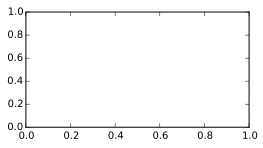

In [26]:
plt.close("all")
fig, ax = plt.subplots(figsize=(4,2))
axis_x = ax.xaxis

In [28]:
# X轴的刻度位置
axis_x.get_ticklocs() 

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [30]:
print axis_x.get_ticklabels() # 获得刻度标签列表
print [x.get_text() for x in axis_x.get_ticklabels()] # 获得刻度的文本字符串

<a list of 6 Text major ticklabel objects>
[u'0.0', u'0.2', u'0.4', u'0.6', u'0.8', u'1.0']


In [31]:
axis_x.get_ticklines() 

<a list of 12 Line2D ticklines objects>

In [32]:
axis_x.get_ticklines(minor=True) # 获得副刻度线列表

<a list of 0 Line2D ticklines objects>

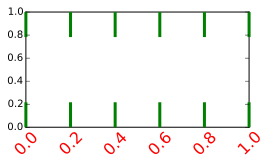

In [34]:
# 配置X轴的刻度线和刻度文本的样式
for label in axis_x.get_ticklabels():
    label.set_color("red")
    label.set_rotation(45)
    label.set_fontsize(16)
     
for line in axis_x.get_ticklines():
    line.set_color("green")
    line.set_markersize(25)
    line.set_markeredgewidth(3)
fig

In [36]:
print axis_x.get_minor_locator() # 计算副刻度位置的对象
print axis_x.get_major_locator() # 计算主刻度位置的对象

配置刻度线位置的Locator类和控制刻度文本的Formatter类

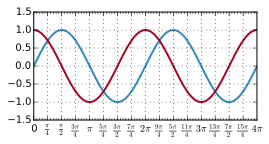

In [66]:
#%fig=配置X轴的刻度线的位置和文本，并开启副刻度线

from fractions import Fraction
from matplotlib.ticker import MultipleLocator, FuncFormatter #❶
x = np.arange(0, 4*np.pi, 0.01)
fig, ax = plt.subplots(figsize=(4,2))
plt.plot(x, np.sin(x), x, np.cos(x))

def pi_formatter(x, pos): #❷
    frac = Fraction(int(np.round(x / (np.pi/4))), 4)
    d, n = frac.denominator, frac.numerator
    if frac == 0:
        return "0"
    elif frac == 1:
        return "$\pi$"
    elif d == 1:
        return r"${%d} \pi$" % n
    elif n == 1:
        return r"$\frac{\pi}{%d}$" % d
    return r"$\frac{%d \pi}{%d}$" % (n, d)

# 设置两个坐标轴的范围
plt.ylim(-1.5,1.5)
plt.xlim(0, np.max(x))

# 设置图的底边距
plt.subplots_adjust(bottom = 0.15)

plt.grid() #开启网格

# 主刻度为pi/4
ax.xaxis.set_major_locator( MultipleLocator(np.pi/4) ) #❸

# 主刻度文本用pi_formatter函数计算
ax.xaxis.set_major_formatter( FuncFormatter( pi_formatter ) ) #❹

# 副刻度为pi/20
ax.xaxis.set_minor_locator( MultipleLocator(np.pi/20) ) #❺

# 设置刻度文本的大小
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(10)


### Artist对象的关系

> `scpy2.common.GraphvizMatplotlib`：将matplotlib的对象关系输出成dot图。

P:\winpython\WinPython-32bit-2.7.9.2\python-2.7.9\lib\site-packages\matplotlib\font_manager.py:1282: UserWarning: findfont: Font family [u'WenQuanYi Micro Hei'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


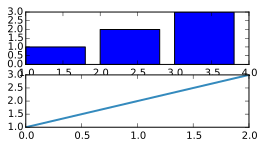

In [4]:
#%nofig
fig = plt.figure(figsize=(4,2))
plt.subplot(211)
plt.bar([1, 2, 3], [1, 2, 3])
plt.subplot(212)
plt.plot([1, 2, 3]);

***
***

In [7]:
#%fig=使用GraphvizMatplotlib生成图表对象中各个Artist对象之间的关系图
from scpy2.common import GraphvizMatplotlib
%dot GraphvizMatplotlib.graphviz(fig)

In [ ]:
fig_to_dot = GraphvizMatplotlib.graphviz(fig)
# 创建fig.dot文件, 并将对象关系字符串写入其中
f = open('fig.dot','w')
print >> f, fig_to_dot
f.close()

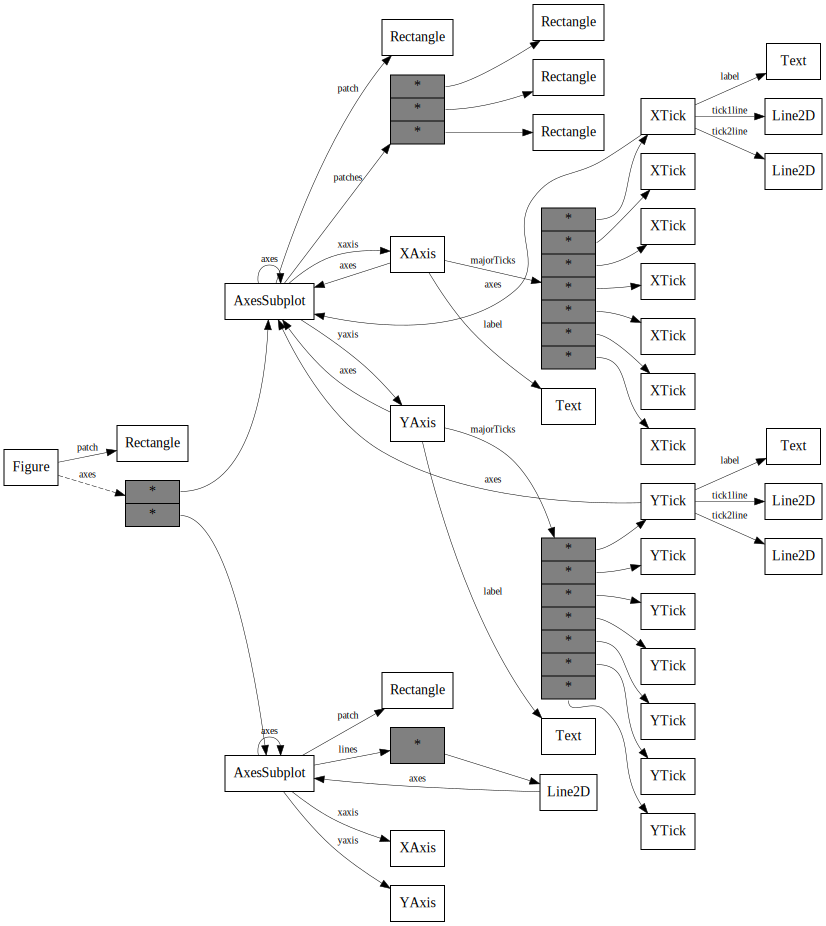

In [9]:
import graphviz
with open("fig.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)